Problem Statement: Creating a Movie recommendation system which provides list of similar movies by analysing ratings provided by the user

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

Loading the dataset which contains list of movies and users who have watched those movies

In [2]:
movies_title_df=pd.read_csv('Movie_Id_Titles')

In [3]:
movies_title_df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
movies_title_df.tail()

,item_id,title
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)
1681,1682,Scream of Stone (Schrei aus Stein) (1991)


Getting numerical statistics for the movies dataset

In [5]:
movies_title_df.describe()

,item_id
count,1682.000000
mean,841.500000
std,485.695893
min,1.000000
25%,421.250000
50%,841.500000
75%,1261.750000
max,1682.000000


Checking if any null values present in the dataset

In [6]:
movies_title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


Loading the ratings dataset which contains ratings provided by the users for the movies listed

In [7]:
ratings_df=pd.read_csv('u.data',sep='\t',names=['user_id','item_id','ratings','timestamp'])
ratings_df.head()

,user_id,item_id,ratings,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Dropping the timestamp column which is not necessary for further analysis

In [8]:
ratings_df.drop(['timestamp'],axis=1,inplace=True)
ratings_df.head()

,user_id,item_id,ratings
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


Getting numerical statistics for the ratings dataset

In [9]:
ratings_df.describe()

,user_id,item_id,ratings
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


Checking if any null values present in ratings dataset

In [10]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100003 non-null  int64
 1   item_id  100003 non-null  int64
 2   ratings  100003 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


Merging two datasets with item_id as common column

In [11]:
ratings_df=pd.merge(movies_title_df,ratings_df,on='item_id')

In [12]:
ratings_df.head()

,item_id,title,user_id,ratings
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


Getting numerical statistics with respect to ratings

In [13]:
ratings_df.groupby('title').describe()

item_id                               \
                                        count    mean  std     min     25%   
title                                                                        
'Til There Was You (1997)                 9.0  1300.0  0.0  1300.0  1300.0   
1-900 (1994)                              5.0  1353.0  0.0  1353.0  1353.0   
101 Dalmatians (1996)                   109.0   225.0  0.0   225.0   225.0   
12 Angry Men (1957)                     125.0   178.0  0.0   178.0   178.0   
187 (1997)                               41.0   330.0  0.0   330.0   330.0   
...                                       ...     ...  ...     ...     ...   
Young Guns II (1990)                     44.0  1188.0  0.0  1188.0  1188.0   
Young Poisoner's Handbook, The (1995)    41.0   547.0  0.0   547.0   547.0   
Zeus and Roxanne (1997)                   6.0  1164.0  0.0  1164.0  1164.0   
unknown                                   9.0   267.0  0.0   267.0   267.0   
Á köldum klaka (Cold Fever) (1994)        1.0  1633.0  NaN  1633.0  1633.0   

                                                              user_id  \
                                          50%     75%     max   count   
title                                                                   
'Til There Was You (1997)              1300.0  1300.0  1300.0     9.0   
1-900 (1994)                           1353.0  1353.0  1353.0     5.0   
101 Dalmatians (1996)                   225.0   225.0   225.0   109.0   
12 Angry Men (1957)                     178.0   178.0   178.0   125.0   
187 (1997)                              330.0   330.0   330.0    41.0   
...                                       ...     ...     ...     ...   
Young Guns II (1990)                   1188.0  1188.0  1188.0    44.0   
Young Poisoner's Handbook, The (1995)   547.0   547.0   547.0    41.0   
Zeus and Roxanne (1997)                1164.0  1164.0  1164.0     6.0   
unknown                                 267.0   267.0   267.0     9.0   
Á köldum klaka (Cold Fever) (1994)     1633.0  1633.0  1633.0     1.0   

                                                   ...               ratings  \
                                             mean  ...    75%    max   count   
title                                              ...                         
'Til There Was You (1997)              383.777778  ...  530.0  782.0     9.0   
1-900 (1994)                           477.000000  ...  581.0  833.0     5.0   
101 Dalmatians (1996)                  450.330275  ...  699.0  938.0   109.0   
12 Angry Men (1957)                    453.552000  ...  661.0  932.0   125.0   
187 (1997)                             517.097561  ...  698.0  894.0    41.0   
...                                           ...  ...    ...    ...     ...   
Young Guns II (1990)                   504.068182  ...  732.5  943.0    44.0   
Young Poisoner's Handbook, The (1995)  452.487805  ...  634.0  936.0    41.0   
Zeus and Roxanne (1997)                532.833333  ...  796.5  881.0     6.0   
unknown                                311.888889  ...  422.0  833.0     9.0   
Á köldum klaka (Cold Fever) (1994)     655.000000  ...  655.0  655.0     1.0   

                                                                           \
                                           mean       std  min   25%  50%   
title                                                                       
'Til There Was You (1997)              2.333333  1.000000  1.0  2.00  2.0   
1-900 (1994)                           2.600000  1.516575  1.0  1.00  3.0   
101 Dalmatians (1996)                  2.908257  1.076184  1.0  2.00  3.0   
12 Angry Men (1957)                    4.344000  0.719588  2.0  4.00  4.0   
187 (1997)                             3.024390  1.172344  1.0  2.00  3.0   
...                                         ...       ...  ...   ...  ...   
Young Guns II (1990)                   2.772727  1.008421  1.0  2.00  3.0   
Young Poisoner's Handbook, The 

Getting the mean and count column alone and used for further analysis

In [14]:
ratings_df_mean=ratings_df.groupby('title')['ratings'].describe()['mean']

In [15]:
ratings_df_count=ratings_df.groupby('title')['ratings'].describe()['count']

In [16]:
ratings_df_mean_count=pd.concat([ratings_df_mean,ratings_df_count],axis=1)
ratings_df_mean_count.reset_index()

,title,mean,count
0,'Til There Was You (1997),2.333333,9.0
1,1-900 (1994),2.600000,5.0
2,101 Dalmatians (1996),2.908257,109.0
3,12 Angry Men (1957),4.344000,125.0
4,187 (1997),3.024390,41.0
...,...,...,...
1659,Young Guns II (1990),2.772727,44.0
1660,"Young Poisoner's Handbook, The (1995)",3.341463,41.0
1661,Zeus and Roxanne (1997),2.166667,6.0
1662,unknown,3.444444,9.0


Visualizing the mean in a histogram

<AxesSubplot:ylabel='Frequency'>

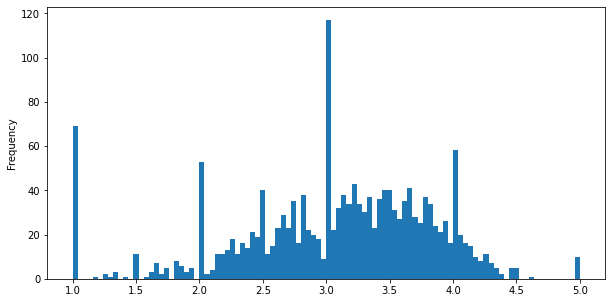

In [17]:
plt.rcParams['figure.figsize']=[10,5]
ratings_df_mean_count['mean'].plot(kind='hist',bins=100)

Nearly 10 movies were rated 5 stars were rated only once.This seems like only one person has given 5 star rating to those movies
Many people around 115 has given 3 stars to most of the movies

Nearly 10 movies were rated 5 stars that were listed below

In [18]:
ratings_df_mean_count[ratings_df_mean_count['mean']==5]


,mean,count
title,,
Aiqing wansui (1994),5.0,1.0
Entertaining Angels: The Dorothy Day Story (1996),5.0,1.0
"Great Day in Harlem, A (1994)",5.0,1.0
Marlene Dietrich: Shadow and Light (1996),5.0,1.0
Prefontaine (1997),5.0,3.0
"Saint of Fort Washington, The (1993)",5.0,2.0
Santa with Muscles (1996),5.0,2.0
Someone Else's America (1995),5.0,1.0
Star Kid (1997),5.0,3.0


Visualizing the count using histogram

<AxesSubplot:ylabel='Frequency'>

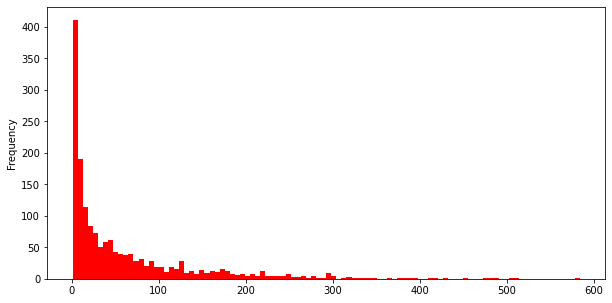

In [19]:
plt.rcParams['figure.figsize']=[10,5]
ratings_df_mean_count['count'].plot(kind='hist',bins=100,color='r')

This shows that only few movies around 50 were rated many number of ratings 

Highly rated movies

In [20]:
ratings_df_mean_count.sort_values('count',ascending=False).head(150)

,mean,count
title,,
Star Wars (1977),4.359589,584.0
Contact (1997),3.803536,509.0
Fargo (1996),4.155512,508.0
Return of the Jedi (1983),4.007890,507.0
Liar Liar (1997),3.156701,485.0
...,...,...
Primal Fear (1996),3.601124,178.0
Mary Poppins (1964),3.724719,178.0
Emma (1996),3.717514,177.0


Low rated movies

In [21]:
ratings_df_mean_count.sort_values('count',ascending=True).head(150)

,mean,count
title,,
Á köldum klaka (Cold Fever) (1994),3.0,1.0
Mille bolle blu (1993),1.0,1.0
Mat' i syn (1997),1.0,1.0
Marlene Dietrich: Shadow and Light (1996),5.0,1.0
"Man from Down Under, The (1943)",1.0,1.0
...,...,...
Tough and Deadly (1995),3.0,2.0
"Collectionneuse, La (1967)",2.0,2.0
Condition Red (1995),2.0,2.0


Creating matrix of ratings given by every user with respect to each movie

In [22]:
user_id_ratings_matrix=ratings_df.pivot_table(index='user_id',columns='title',values='ratings')
user_id_ratings_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


User Ratings for the movie StarWars and Titanic is shown below

In [23]:
starwars=user_id_ratings_matrix['Star Wars (1977)']
starwars

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [24]:
titanic=user_id_ratings_matrix['Titanic (1997)']
titanic

user_id
0      NaN
1      NaN
2      5.0
3      NaN
4      NaN
      ... 
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 944, dtype: float64

Correlation is exhibited between titanic and all other movies

In [26]:
titanic_correlation=pd.DataFrame(user_id_ratings_matrix.corrwith(titanic),columns=['Correlation'])
titanic_correlation

,Correlation
title,
'Til There Was You (1997),-0.062017
1-900 (1994),NaN
101 Dalmatians (1996),0.120113
12 Angry Men (1957),0.077700
187 (1997),0.315654
...,...
Young Guns II (1990),0.317274
"Young Poisoner's Handbook, The (1995)",0.356783
Zeus and Roxanne (1997),NaN


In [27]:
titanic_correlation=titanic_correlation.join(ratings_df_mean_count['count'])
titanic_correlation

,Correlation,count
title,,
'Til There Was You (1997),-0.062017,9.0
1-900 (1994),NaN,5.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
...,...,...
Young Guns II (1990),0.317274,44.0
"Young Poisoner's Handbook, The (1995)",0.356783,41.0
Zeus and Roxanne (1997),NaN,6.0


Removing null values in correlation column

In [31]:
titanic_correlation.dropna(inplace=True)
titanic_correlation

,Correlation,count
title,,
'Til There Was You (1997),-0.062017,9.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
2 Days in the Valley (1996),0.017295,93.0
...,...,...
Year of the Horse (1997),1.000000,7.0
Young Frankenstein (1974),0.107666,200.0
Young Guns (1988),0.199931,101.0


Sorting based on correlation values

In [32]:
titanic_correlation.sort_values('Correlation',ascending=False)

,Correlation,count
title,,
Nadja (1994),1.0,8.0
"Pest, The (1997)",1.0,8.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.0
For Ever Mozart (1996),1.0,3.0
"Jerky Boys, The (1994)",1.0,3.0
...,...,...
Pather Panchali (1955),-1.0,8.0
Angel Baby (1995),-1.0,4.0
Blood Beach (1981),-1.0,6.0


Top 5 movies which are highly correlated with titanic

In [35]:
titanic_correlation[titanic_correlation['count']>80].sort_values('Correlation',ascending=False).head()

,Correlation,count
title,,
Titanic (1997),1.000000,350.0
"River Wild, The (1994)",0.497600,146.0
"Abyss, The (1989)",0.472103,151.0
Bram Stoker's Dracula (1992),0.443560,120.0
True Lies (1994),0.435104,208.0


Correlation is exhibited between Star Wars and other movies

In [48]:
starwars_correlation=pd.DataFrame(user_id_ratings_matrix.corrwith(starwars),columns=['Correlation'])
starwars_correlation

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


Removing null values in correlation column

In [49]:
starwars_correlation.dropna(inplace=True)

In [50]:
starwars_correlation=starwars_correlation.join(ratings_df_mean_count['count'])
starwars_correlation

,Correlation,count
title,,
'Til There Was You (1997),0.872872,9.0
1-900 (1994),-0.645497,5.0
101 Dalmatians (1996),0.211132,109.0
12 Angry Men (1957),0.184289,125.0
187 (1997),0.027398,41.0
...,...,...
Young Guns (1988),0.186377,101.0
Young Guns II (1990),0.228615,44.0
"Young Poisoner's Handbook, The (1995)",-0.007374,41.0


Top 5 movies which are highly correlated with starwars

In [52]:
starwars_correlation=starwars_correlation[starwars_correlation['count']>80].sort_values('Correlation',ascending=False)
starwars_correlation.head()

,Correlation,count
title,,
Star Wars (1977),1.000000,584.0
"Empire Strikes Back, The (1980)",0.748353,368.0
Return of the Jedi (1983),0.672556,507.0
Raiders of the Lost Ark (1981),0.536117,420.0
Austin Powers: International Man of Mystery (1997),0.377433,130.0


Creating correlation matrix between all the movies using pearson's coefficient

In [53]:
movies_correlation=user_id_ratings_matrix.corr(method='pearson',min_periods=80)
movies_correlation

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Loading the user ratings list

In [66]:
myratings=pd.read_csv('My_Ratings.csv')
myratings

,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1
2,Titanic (1997),3


Checking movies provided by user with respect to the movie list for similar ones

In [67]:
similarmovies_list=pd.Series()
for i in range(len(myratings)):
    similarmovies=movies_correlation[myratings['Movie Name'][i]].dropna()
    similarmovies=similarmovies.map(lambda x:x*myratings['Ratings'][i])
    similarmovies_list=similarmovies_list.append(similarmovies)
    
   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


List of movies similar to 'Liar Liar (1997)' is listed below

In [68]:
similarmovies_list.sort_values(inplace=True,ascending=False)
similarmovies_list.head(10)

Liar Liar (1997)                             5.000000
Titanic (1997)                               3.000000
Con Air (1997)                               2.349141
Pretty Woman (1990)                          2.348951
Michael (1996)                               2.210110
Indiana Jones and the Last Crusade (1989)    2.072136
Top Gun (1986)                               2.028602
G.I. Jane (1997)                             1.989656
Multiplicity (1996)                          1.984302
Grumpier Old Men (1995)                      1.953494
dtype: float64

List of movies similar to 'Star Wars' is given below

In [69]:
similarmovies_list=pd.Series()
for i in range(1,2):
    similarmovies=movies_correlation[myratings['Movie Name'][i]].dropna()
    similarmovies=similarmovies.map(lambda x:x*myratings['Ratings'][i])
    similarmovies_list=similarmovies_list.append(similarmovies)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [70]:
similarmovies_list.sort_values(inplace=True,ascending=False)
similarmovies_list.head(10)

Star Wars (1977)                                      1.000000
Empire Strikes Back, The (1980)                       0.748353
Return of the Jedi (1983)                             0.672556
Raiders of the Lost Ark (1981)                        0.536117
Austin Powers: International Man of Mystery (1997)    0.377433
Sting, The (1973)                                     0.367538
Indiana Jones and the Last Crusade (1989)             0.350107
Pinocchio (1940)                                      0.347868
Frighteners, The (1996)                               0.332729
L.A. Confidential (1997)                              0.319065
dtype: float64

In [71]:
similarmovies_list=pd.Series()
for i in range(2,3):
    similarmovies=movies_correlation[myratings['Movie Name'][i]].dropna()
    similarmovies=similarmovies.map(lambda x:x*myratings['Ratings'][i])
    similarmovies_list=similarmovies_list.append(similarmovies)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


List of similar movies to Titanic(1997)

In [72]:
similarmovies_list.sort_values(inplace=True,ascending=False)
similarmovies_list.head(10)

Titanic (1997)                       3.000000
True Lies (1994)                     1.305312
Die Hard (1988)                      1.209372
Air Force One (1997)                 1.151190
Jurassic Park (1993)                 1.148354
E.T. the Extra-Terrestrial (1982)    1.119604
Eraser (1996)                        1.113419
Twister (1996)                       1.086890
Dante's Peak (1997)                  1.071678
Braveheart (1995)                    1.070294
dtype: float64

Conclusion: Based on the user rating for several movies given in the Movies_Id_Titles dataset we can get list of similar movies based on Pearson's Coeffient